In [34]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Downloading NLTK resources
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
# Initialize VADER sentiment 
sia = SentimentIntensityAnalyzer()

In [36]:
def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    return "Positive" if score >= 0.05 else "Negative" if score <= -0.05 else "Neutral"

In [40]:
df=pd.read_csv("../TEST 1/reddit_posts.csv")

In [42]:
df["sentiment"] = df["content"].apply(get_sentiment)

In [43]:
df.head()

,post_id,timestamp,content,likes,comments,shares,sentiment
0,1jbvq2g,1.742047e+09,anxiety makes throw anytime im experience hard...,1,0,0,Negative
1,1jbvjdz,1.742047e+09,saturday depression saturday second weekend da...,1,0,0,Negative
2,1jbvj2f,1.742047e+09,one cares want end life going downhill years r...,2,0,0,Negative
3,1jbv9iz,1.742046e+09,anti depressants depressed hurts everyone arou...,1,0,0,Negative
4,1jbv83i,1.742046e+09,support boyfriend 26m depression boyfriend rec...,1,0,0,Positive


In [44]:
# Define labeled dataset
risk_labels = {
    "High-Risk": ["suicide", "kill myself", "end my life", "don't want to be here"],
    "Moderate Concern": ["struggling", "depressed", "lost", "anxious", "need help"],
    "Low Concern": ["mental health", "awareness", "self-care", "therapy"],
}

In [45]:
# Assign labels using cosine similarity (better than simple keyword match)
def assign_risk_level(text):
    for label, words in risk_labels.items():
        if any(word in text for word in words):
            return label
    return "Low Concern"

In [47]:
df["risk_level"] = df["content"].apply(assign_risk_level)

In [49]:
# TF-IDF Vectorization + ML Model
X = df["content"]
y = df["risk_level"]

In [50]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=1000, stop_words="english")),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [53]:
# Predictions
df["predicted_risk"] = pipeline.predict(X)

In [54]:
# Evaluate Model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

                  precision    recall  f1-score   support

       High-Risk       0.00      0.00      0.00         3
     Low Concern       0.76      0.79      0.78        24
Moderate Concern       0.73      0.80      0.76        20

        accuracy                           0.74        47
       macro avg       0.50      0.53      0.51        47
    weighted avg       0.70      0.74      0.72        47

Accuracy: 0.7446808510638298


C:\Users\mohda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [55]:
# Saving...
df.to_csv("classified_reddit_posts.csv", index=False)

C:\Users\mohda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mohda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


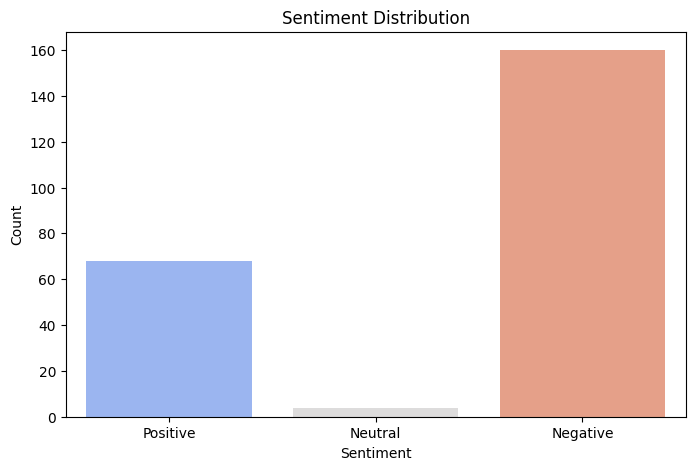

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment'], palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\mohda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mohda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


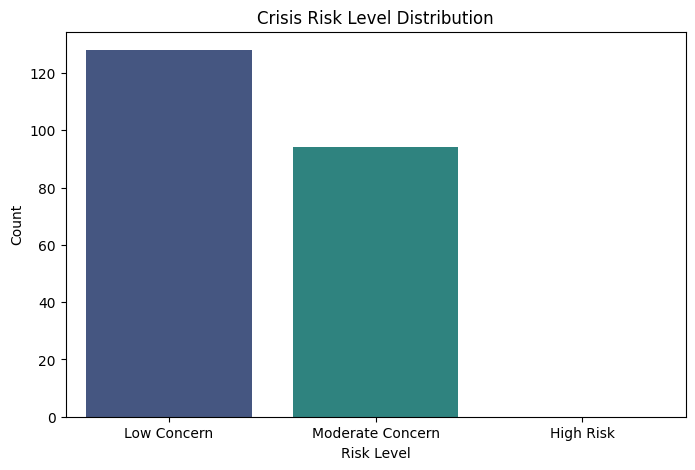

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['risk_level'], palette='viridis', order=['Low Concern', 'Moderate Concern', 'High Risk'])
plt.title('Crisis Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()